# ProbStats Lab1 -- HT week 3

The problems in Laboratory 1 (week 3) for Probability and Statistics focus on the probability of events, specifically binomial probabilities. Use this empty notebook to complete portions of the Laboratory that require the Math, NumPy, SciPy, Matplotlib and other Python libraries. I've loaded these libraries to get you started.  


In [2]:
# Import Math, NumPy, SciPy, and Matplotlib
import math as m
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt 

# Q1

Probabilities might seem simple offhand, but our intuitive grasp on likely outcomes is often not as good as
we’d like to think. Here we’ll consider a (possibly humbling) example. In both palaeobiology and ecology,
the term richness is used to describe the number of kinds of organisms (species, genera, etc.) known from a
given sample (bedding plane, geological formation, forest, lake, etc.). The lower Eocene (Ypresian) limestone
beds of Bolca, in the foothills of the Italian Alps, yield a rich fauna of fossil fishes totaling around 200 species.
Let us assume that these species occur with equal relative frequency; this is biologically unrealistic but will
make our calculations easier.

## Q1a

Determine the frequency at which any given species occurs in the fauna. If you’ve calculated this
correctly, you should notice the probability of sampling any given species in a single trial is very
unlikely. Even more unlikely is the chance of all examples within a random sample belonging to the
same species

1/200
## Q1b

Write a general expression for the probability that all specimens within a sample of N fossils belong
to a particular species. (Hint: it might help you to rephrase this problem as the probability that all
specimens belong to “species 1.”)

$ (1/200)^N $

## Q1c

Write a general expression for the probability that all specimens within a sample of N fossils belong
to the same species, with no consideration of the species to which all those examples are assigned.
(Hint: find another way of putting this in words, along the lines of the hint provided above.) Try using
some reasonable values of N to calculate probabilities using the expressions you’ve derived above.
As you’ll see, even for small N, the probabilities are vanishingly small. This should match your
intuition.

$ (1/200)^ {N-1} $, because we do not care what the first draw is, as long as the rest are the same as the first draw, a.k.a
$ 200\times (1/200)^(N) $


## Q1d

A set of 20 specimens have recently been recovered from Bolca. Do you think the probability that at
least two of these fossils belong to the same species is high or low? Explain your reasoning

Probability is low because $20\times (1/200)^2$ 

## Q1e

Conduct a numerical experiment to test whether or not your initial intuition
on this problem was reliable. We’ll use the built-in NumPy function for generating random integers
over a specified range: random.Generator.intergers().
Here we’ll treat individual integers as equivalent to the different species known from Bolca (1 equals
“species 1”, 2 equals “species 2”, and so on). Using random.Generator.intergers(), generate a
sample of 20 randomly chosen specimens within a one-dimensional array. Examine your sample
visually, and note if any of your fossils belong to the same species (i.e., the same number appears
more than once). Here it might be helpful to use the NumPy function numpy.sort() on your array.
Does your sample contain more than one example of any species? Record this outcome, and we’ll
compare results as a class at the beginning of the next lecture.

### Q1e(trial 1)

In [11]:
rng = np.random.default_rng()
rng.integers(201, size=20)
my_array = rng.integers(201, size=20)
np.sort(my_array)

array([  6,  16,  17,  24,  24,  55,  61,  76,  80,  80,  80,  82, 123,
       124, 145, 154, 163, 177, 187, 190])

### Q1e(trial 2)

In [12]:
rng = np.random.default_rng()
rng.integers(201, size=20)
my_array = rng.integers(201, size=20)
np.sort(my_array)

array([  8,  21,  23,  37,  38,  45,  47,  65,  69,  79,  94,  94, 120,
       131, 141, 148, 155, 161, 179, 180])

### Q1f

Derive a general probability expression for at least one species-pair match for a sample of N taxa from
Bolca.

P(>=1 match)= 1- P(no match)

P(>=1 match)=1- $\frac{(199!)}{(200^{N-1})(200-(N-1))}$

# Q2

In the search for subglacial conduits, glaciologists might drill boreholes through ice sheets in the hope of finding
a subglacial conduit by chance (as opposed to a part of the bed without a conduit). The probability that any
individual borehole will result in the discovery of a conduit might be approximated by comparing success
rates of drilling into conduits in similar ice-sheet settings.

## Q2a

Suppose that a survey of all available data reveals that of the 378 boreholes drilled in comparable
glaciological settings, 314 were not conduits. Assuming the locations of these boreholes were selected
at random (rather than chosen based on the results of previous drilling), what is a reasonable estimate
of the probability that a randomly drilled borehole in our field site will find a subglacial conduit? What
is the probability that this borehole will not find a subglacial conduit?

$p=\frac{64}{378}, q=\frac{314}{378}$

## Q2b

Using the anticipated success ratio above, determine how likely an exploration program that drills 5
boreholes will be a failure. How about 10 boreholes? How many boreholes would you want to drill
before you were 95% certain of discovering at least one subglacial conduit?

5 boreholes: $(\frac{314}{378})^5 = 0.3955$

10 boreholes: $(\frac{314}{378})^{10} = 0.1565$

5% chance of failure: $(\frac{314}{378})^x = 0.05$

$x=16.14\approx 17$

## Q2c

You’ve now been dispatched to a much more promising field site, with an expected success rate p of
0.5. Using the function random.binomial(), simulate the outcomes of 20 borehole drilling programs,
each drilling 4 boreholes. Calculate the frequency of successful drilling projects (i.e., those that yield
at least one subglacial-conduit-bearing borehole) in which exactly two discoveries are made by visual
inspection of your synthetic data. Compare this simulated result to the analytical solution for this
problem, and discuss any observed difference.

In [37]:
p = 0.5
success_list=0
two_discoveries=0

number_of_programs = 20
number_of_boreholes = 4

outcomes = np.random.binomial(number_of_boreholes, p, number_of_programs)

for outcome in outcomes:
    if outcome==2:
        two_discoveries+=1
    if outcome>0:
        success_list+=1
    

print(f"Frequency of successful drilling projects: {success_list} out of {number_of_programs}")
print(f"Frequency of succeses with exactly two discoveries : {two_discoveries} out of {number_of_programs}")

Frequency of successful drilling projects: 19 out of 20
Frequency of succeses with exactly two discoveries : 8 out of 20


#### Analytical solution 

Binomial formula =$ \sum_{k=0}^n \binom{n}{k} a^k b^{n-k}$

where $n=4$ and $k=2$

Probability =0.375

Probability is $\frac{3}{8}$ , close to $\frac{8}{20}$

# Q3

NumPy has a built-in function for simulating the outcome (of binomial “experiments”: random.binomial().
This function utilizes two parameters that you will remember from lecture: N, the number of trials; and p, the
probability of success. Generate a one-dimensional array giving the outcome of 10,000 Bernoulli experiments
(which, by definition, have one trial each), with the probability of success p = 0.75. Recall that a result of “1”
represents a success, while “0” indicates a failure.


In [37]:
outcomes_array = np.random.binomial(1, 0.75, 10000)

print(outcomes_array)

[1 0 0 ... 1 1 1]


## Q3a

Calculate the frequency of success for the first 10, 100, 1000 experiments. The “frequency of success”
means the proportion of the experiments that are successful; 4 out of 10 experiments being successful
is a frequency of success of 0.4. Compare these to the frequency of successes for the entire run of
10,000 experiments. What do you notice about these relative frequencies as the number of experiments
increases?


In [38]:
success_frequency_10 = np.sum(outcomes_array [:10]) / 10
print(f"Frequency of success for 10 experiments: {success_frequency_10}")
success_frequency_100 = np.sum(outcomes_array [:100]) / 100
print(f"Frequency of success for 100 experiments: {success_frequency_10}")
success_frequency_10 = np.sum(outcomes_array [:1000]) / 1000
print(f"Frequency of success for 1000 experiments: {success_frequency_10}")
success_frequency_10 = np.sum(outcomes_array [:9000]) / 9000
print(f"Frequency of success for 9000 experiments: {success_frequency_10}")
success_frequency_10 = np.sum(outcomes_array [:10000]) / 10000
print(f"Frequency of success for 10000 experiments: {success_frequency_10}")

Frequency of success for 10 experiments: 0.4
Frequency of success for 100 experiments: 0.4
Frequency of success for 1000 experiments: 0.772
Frequency of success for 9000 experiments: 0.7535555555555555
Frequency of success for 10000 experiments: 0.7543


As number increases, frequency of success approaches the original 0.75?

## Q3b

Now calculate the frequency of success for the first 1, 2, 3 . . . 10,000 experiments (hint: you might
want to explore the NumPy function numpy.cumsum()). Plot these data and label the axes
appropriately. Plot your data as a continuous black line without individual data points shown.

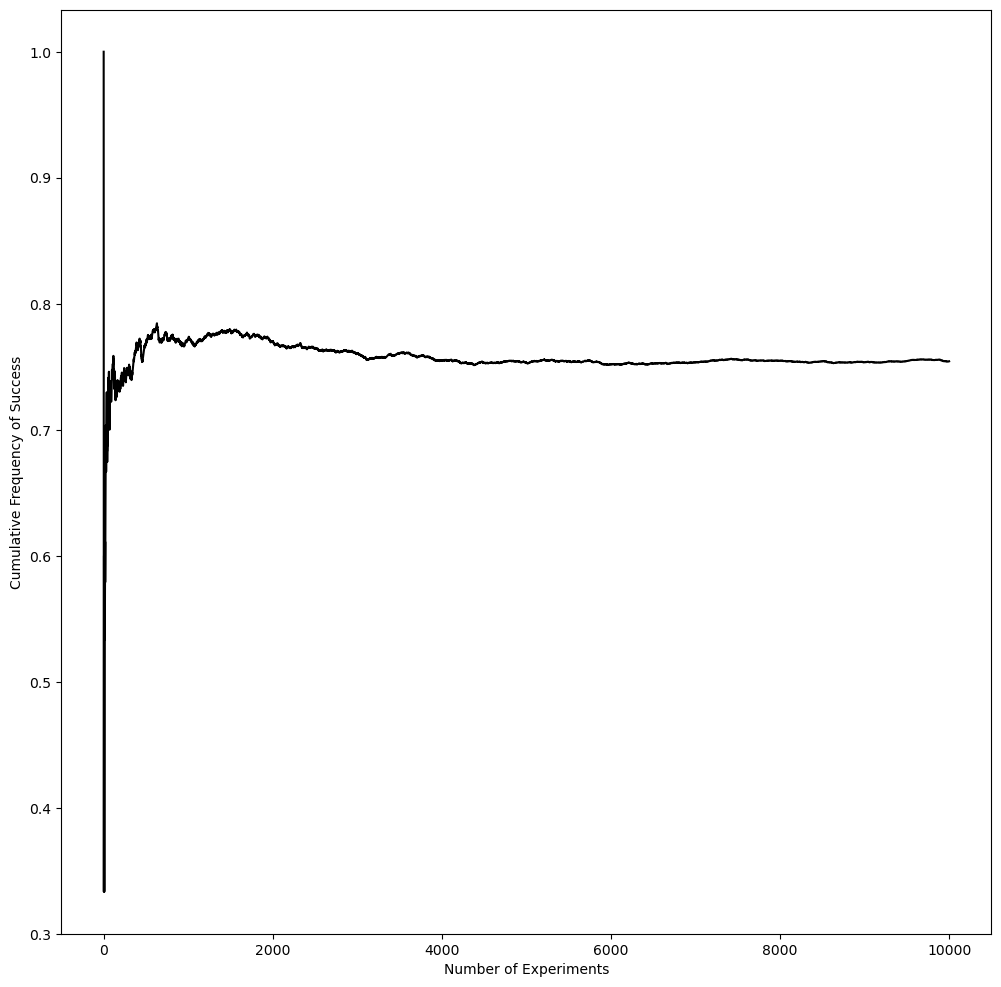

In [39]:
cumulative_frequency = np.cumsum(outcomes_array) / np.arange(1, 10001)



fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(np.arange(1, 10001), cumulative_frequency, color='black', label='Cumulative Frequency')


ax.set_xlabel('Number of Experiments')
ax.set_ylabel('Cumulative Frequency of Success')


plt.show()



## Question: why isn't my cumulative frequency continually increasing when I print(cumulative_frequency)?

In [34]:
print(cumulative_frequency)

[1.         1.         0.66666667 ... 0.75515103 0.75507551 0.7551    ]


# Q4

Our final exercise will require you learn how Python deals with values stored in arrays, and to revisit the
general expression for binomial probabilities.

## Q4a

Begin by creating an array containing integers 0-20. Having done this, write a single line of code that
gives the probability of all numbers of successes for the binomial distribution with N=20 and p=0.5.
In doing so, you may not use any NumPy functions for calculating binomial probabilities. However,
you may use the formula for calculating factorials. Generate a barplot that shows the shape of the
probability distribution. Make sure that the values appearing along the x-axis are correct, and provide
appropriate labels for both axes. (Hint: if you feel stuck, try naming your initial vector k.)



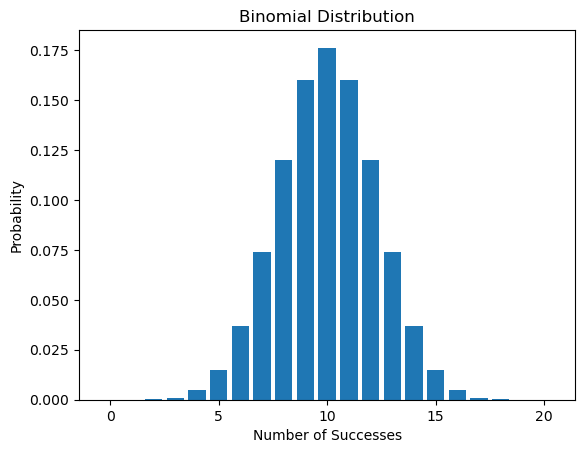

In [12]:

k = np.arange(21)

N = 20
p = 0.5
binomial_probabilities=[]
for x in k:
    binomial_probabilities.append(m.factorial(N) / (m.factorial(x) * m.factorial(N - x)) * p**x * (1 - p)**(N - x))


fig, ax = plt.subplots()


ax.bar(k, binomial_probabilities)
ax.set_xlabel('Number of Successes')
ax.set_ylabel('Probability')
ax.set_title('Binomial Distribution')

plt.show()


# Q4b

Repeat the previous question, but for p=0.25. Produce a plot of the probability distribution. How does
it differ from that you produced for the previous exercise? Why?

The graph is skewed to the right because the probability of success is lower, so it is more likely to get a small number of success

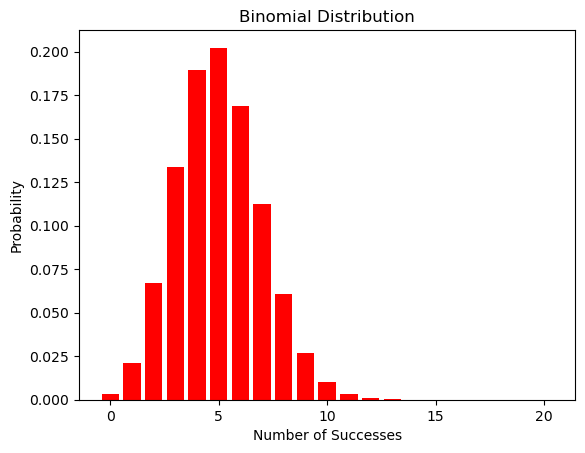

In [13]:
k = np.arange(21)

N = 20
p = 0.25
binomial_probabilities=[]
for x in k:
    binomial_probabilities.append(m.factorial(N) / (m.factorial(x) * m.factorial(N - x)) * p**x * (1 - p)**(N - x))


fig, ax = plt.subplots()


ax.bar(k, binomial_probabilities, color='red')
ax.set_xlabel('Number of Successes')
ax.set_ylabel('Probability')
ax.set_title('Binomial Distribution')

plt.show()

# Q4c

Check your results from the previous two prompts using a SciPy function for calculating binomial
probabilities: scipy.stats.binom.pmf().

In [20]:
k = np.arange(21)
N = 20
p = 0.5


probabilities_1 = sc.stats.binom.pmf(k, N, p)

print("Probabilities for p=0.5:", probabilities)


Probabilities for p=0.5: [3.17121194e-03 2.11414129e-02 6.69478076e-02 1.33895615e-01
 1.89685455e-01 2.02331152e-01 1.68609293e-01 1.12406195e-01
 6.08866892e-02 2.70607508e-02 9.92227528e-03 3.00675008e-03
 7.51687521e-04 1.54192312e-04 2.56987187e-05 3.42649582e-06
 3.56926648e-07 2.79942469e-08 1.55523594e-09 5.45696821e-11
 9.09494702e-13]


In [21]:
k = np.arange(21)
N = 20
p = 0.25


probabilities_2 = sc.stats.binom.pmf(k, N, p)

print("Probabilities for p=0.25:", probabilities)


Probabilities for p=0.25: [3.17121194e-03 2.11414129e-02 6.69478076e-02 1.33895615e-01
 1.89685455e-01 2.02331152e-01 1.68609293e-01 1.12406195e-01
 6.08866892e-02 2.70607508e-02 9.92227528e-03 3.00675008e-03
 7.51687521e-04 1.54192312e-04 2.56987187e-05 3.42649582e-06
 3.56926648e-07 2.79942469e-08 1.55523594e-09 5.45696821e-11
 9.09494702e-13]


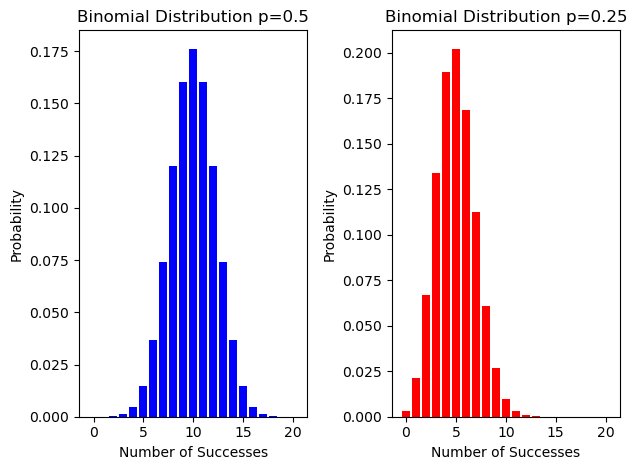

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].bar(k, probabilities_1, color='blue')
ax[0].set_title('Binomial Distribution p=0.5')
ax[0].set_xlabel('Number of Successes')
ax[0].set_ylabel('Probability')

ax[1].bar(k, probabilities_2, color='red')
ax[1].set_title('Binomial Distribution p=0.25')
ax[1].set_xlabel('Number of Successes')
ax[1].set_ylabel('Probability')
fig.tight_layout()
plt.show()

